# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
import pandas as pd
import os

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
## Load and print the sign names

names = pd.read_csv('signnames.csv', index_col='ClassId')

names

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


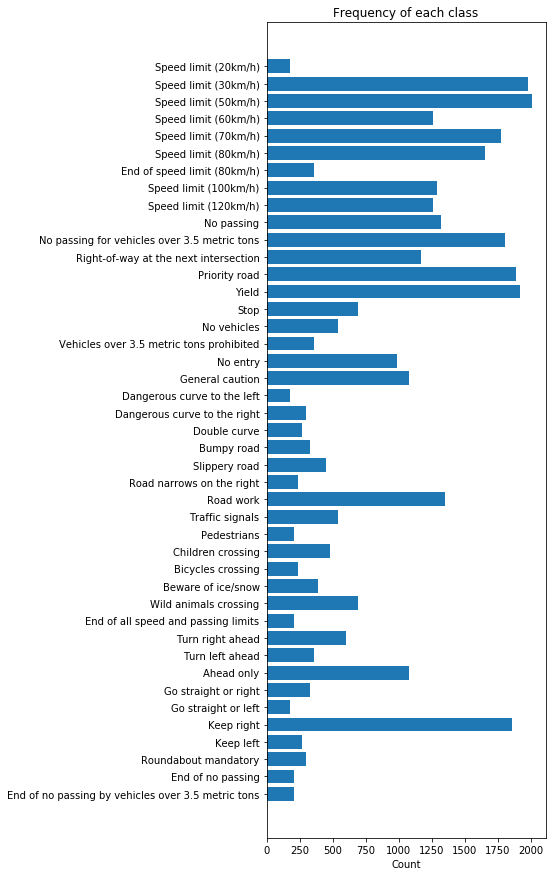

In [5]:
# Knowing the distribution of the data is very important
# Here we can see how many images there are of each class 
# in the training set

classes, counts = np.unique(y_train, return_counts=True)

fig = plt.figure(figsize=(5,15))
plt.barh(classes, counts, align='center')
plt.yticks(classes, names['SignName'])
plt.xlabel('Count')
plt.title('Frequency of each class')
plt.gca().invert_yaxis()
 
plt.show()

As we can see in the chart above, this dataset has quite an obvious level of imbalance between classes. In other words, the amount of image examples we have for each image varies considerably. This is potentially a problem because our model might become biased to the majority classes causing a higher misclassification of the minority classes or even trating them as noise. For example, classes 38 and 39 ("Keep right" and "Keep left") are very similar visually and differ only in the direction of the arrow. Still, there are almost 2.000 examples of the "Keep right" sign and just above 250 examples of the "Keep left" sign. With this distribution it is possible that our model might end up biased towards "Keep right" for these two signs.

Visualizing 16 random images from the training set:


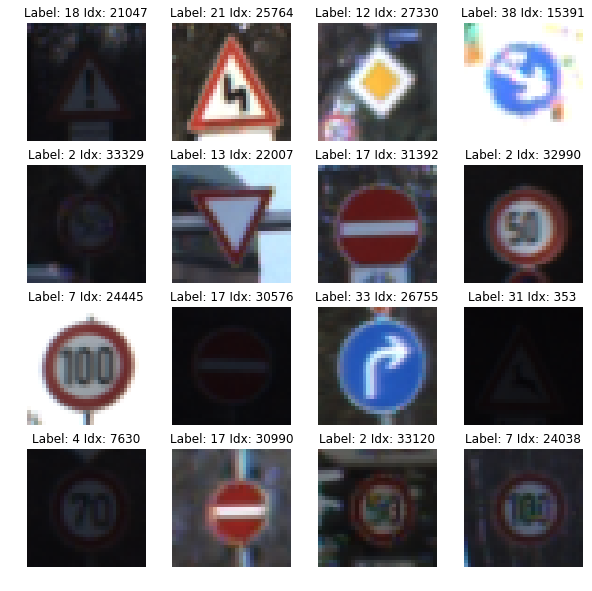

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

print('Visualizing 16 random images from the training set:')

fig, axs = plt.subplots(4, 4, figsize=(10,10))
axs = axs.ravel()

for i in range(16):
    idx = np.random.randint(0, n_train)
    axs[i].set_title('Label: ' + str(y_train[idx])+ ' Idx: '+ str(idx))
    axs[i].imshow(X_train[idx])
    axs[i].set_axis_off()

It is always a good idea to take a look at the data to get an idea of what we are actually working with. These random 16 pictures taken from the training set are a good way of doing this. But it can also be worthwhile to see specific examples from each class:

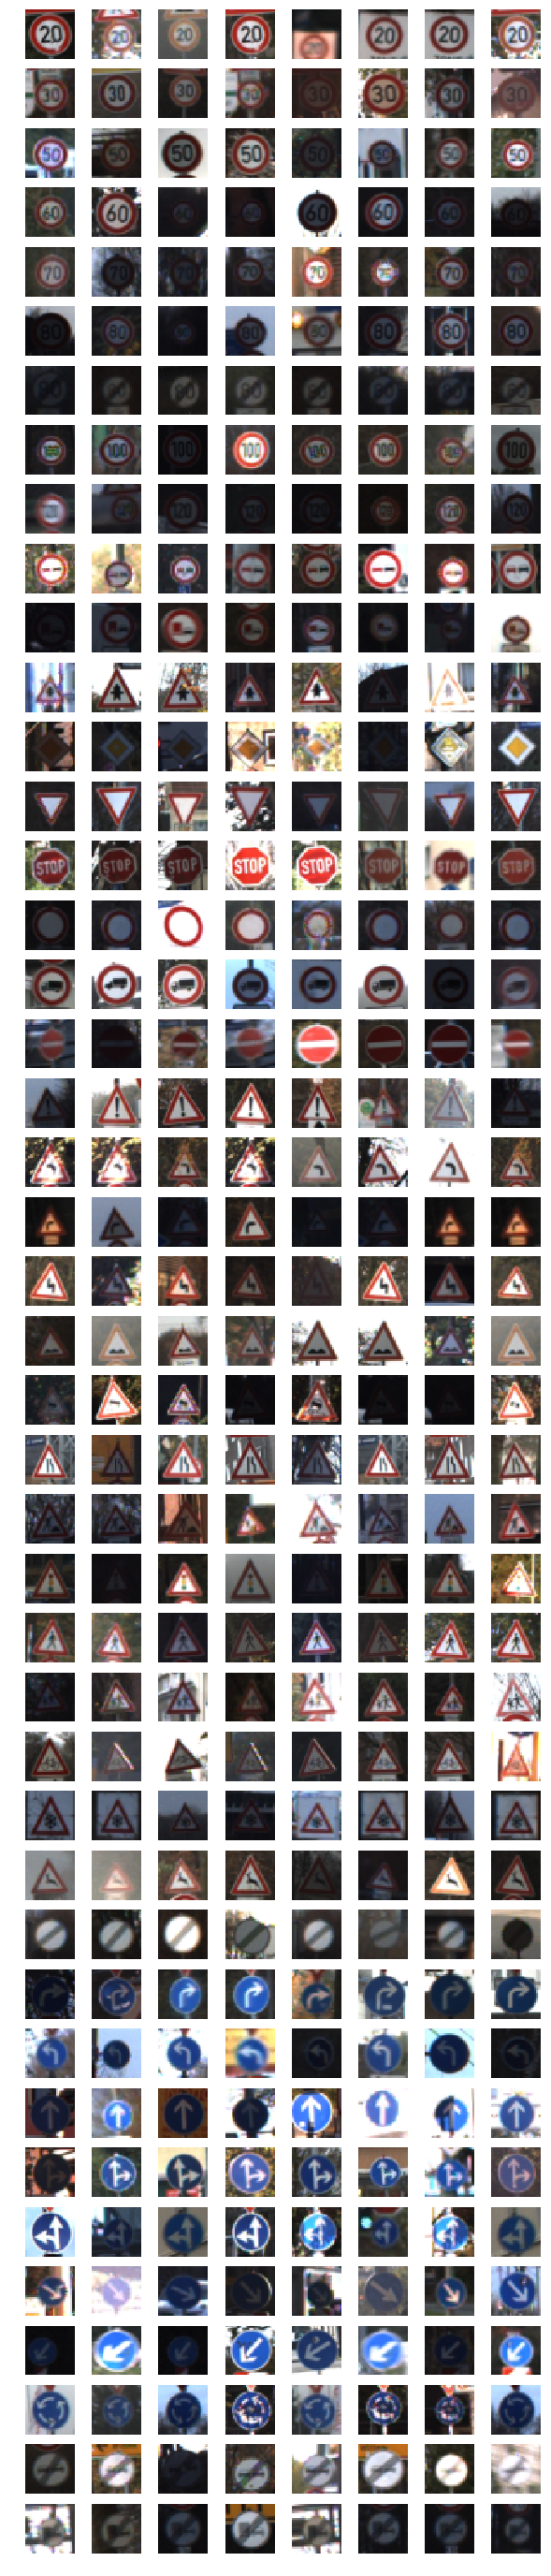

In [7]:
mask = np.hstack([np.random.choice(np.where(y_train == l)[0], 8, replace=False)
                      for l in np.unique(y_train)])

fig, axs = plt.subplots(43, 8, figsize=(10,50))
axs = axs.ravel()

for i in range(344):
    #dx = np.random.randint(0, n_train)
    #axs[i].set_title('Label: ' + str(y_train[mask][i]))
    axs[i].imshow(X_train[mask][i])
    axs[i].set_axis_off()

Here for example, at a first glance it seems like brightness varies a lot between images. This can be an issue, very dark or bright images can be very difficult to classify. But a positive takeaway here is that some of the signs are the same but flipped either to the right or to the left. We can use this knowledge further down for data augmentation. In the next few cells we'll take a closer look at the darker images. 

In [8]:
def bright_avg(rgb_img):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

    b_sum = np.sum(hsv[:,:,2])
    area = rgb_img.shape[0]*rgb_img.shape[1]
    avg = b_sum/area
    
    return avg

In [9]:
dark_images = []

for img in X_train:
    if bright_avg(img) < 60:
        dark_images.append(img)

In [10]:
len(dark_images)

10692

Visualizing 25 random dark images from the training set:


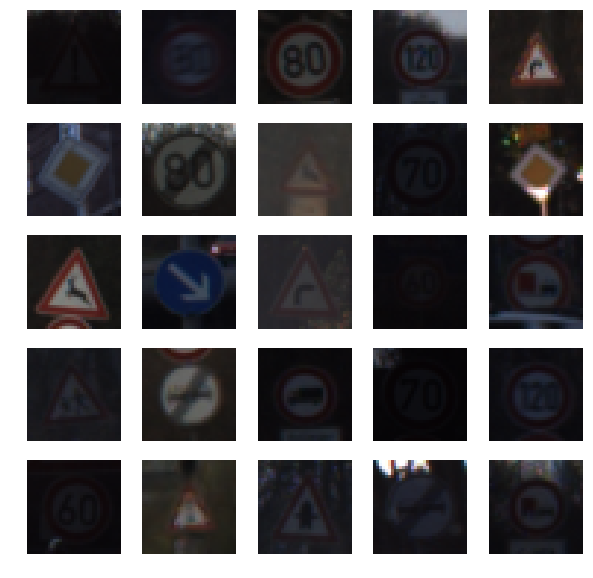

In [11]:
print('Visualizing 25 random dark images from the training set:')

fig, axs = plt.subplots(5, 5, figsize=(10,10))
axs = axs.ravel()

for i in range(25):
    idx = np.random.randint(0, len(dark_images))
    axs[i].imshow(dark_images[idx])
    axs[i].set_axis_off()

Here it is useful for use to take a look at the images in HSV format because the Value (V) dimension is specifically a measure of brightness or intensity of the image. OpenCV manages a range from 0 to 255 for this dimension. So it is particularly interesting to see that almost a third of our training images have an average brightness of under 60. 

Above we can see 25 examples of this darker third of images from our dataset and it is a bit worrying that some of the images are difficult for even a human to identify because of the low brightness so we will have to take care of this during the preprocessing step coming up next.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

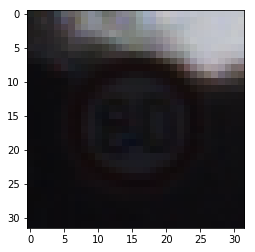

In [12]:
plt.imshow(X_train[13655])

As mentioned earlier, some images are very difficult for even a human to identify like this one above. Fortunately, we have different ways of dealing with this problem like **histogram equalization**. This is a technique that we use to adjust image intensities in order to enhance contrast by analyzing the intensity values and spreading out the most frequent intensities. This method has its limitation though when some areas of the image are much darker or brighter than the rest because the intensities of the whole image are distributed. To solve this, it is common to use adaptive histogram equalization which computes several histograms corresponding to different sections of the image.

We will use a method that goes one step further called **Contrast Limited Adaptive Histogram Equalization (CLAHE)**, because the adaptive histogram equalization sometimes tends to overamplify noise in areas of the image that are relatively homogeneous. This method tries to reduce the overamplification of noise by clipping the histogram at a predefined value. 

Applying CLAHE to a grayscale version of the image above would look like this:

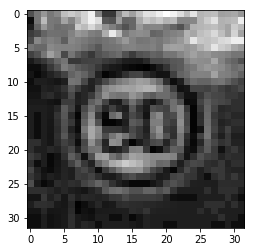

In [13]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(cv2.cvtColor(X_train[13655], cv2.COLOR_RGB2GRAY))

plt.imshow(cl1, cmap='gray')

### Pre-process the Data Set (normalization, grayscale, etc.)

Before applying the preprocessing steps, it can be worthwhile to augment our dataset a bit by flipping the signs that are the same but differ in direction.

In [14]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

mirror_mask = np.hstack([np.where(y_train == l)[0] for l in [11, 12, 13, 15, 17, 18, 22, 26, 30, 35]])
switchable = [[19, 33, 36, 38], [20, 34, 37, 39]]
mask_a = np.hstack([np.where(y_train == l)[0] for l in switchable[0]])
mask_b = np.hstack([np.where(y_train == l)[0] for l in switchable[1]])

X_augment = X_train[mirror_mask].copy()
y_augment = y_train[mirror_mask].copy()

X_temp_a = X_train[mask_a].copy()
X_temp_b = X_train[mask_b].copy()

y_temp_a = y_train[mask_a].copy()
y_temp_b = y_train[mask_b].copy()

y_temp_a = y_temp_a+1
y_temp_b = y_temp_b-1

X_augment = np.concatenate([X_augment, X_temp_a, X_temp_b], axis=0)
y_augment = np.concatenate([y_augment, y_temp_a, y_temp_b], axis=0)

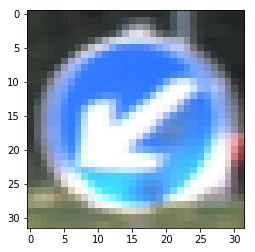

In [15]:
plt.imshow(X_augment[14000])

Printed above is an example of the original image and in the next cell we can see the same image after horizontally flipping all the images in this augmentation set:

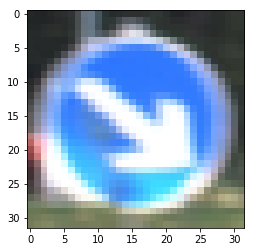

In [16]:
X_augment = np.array([np.fliplr(img) for img in X_augment])
plt.imshow(X_augment[14000])

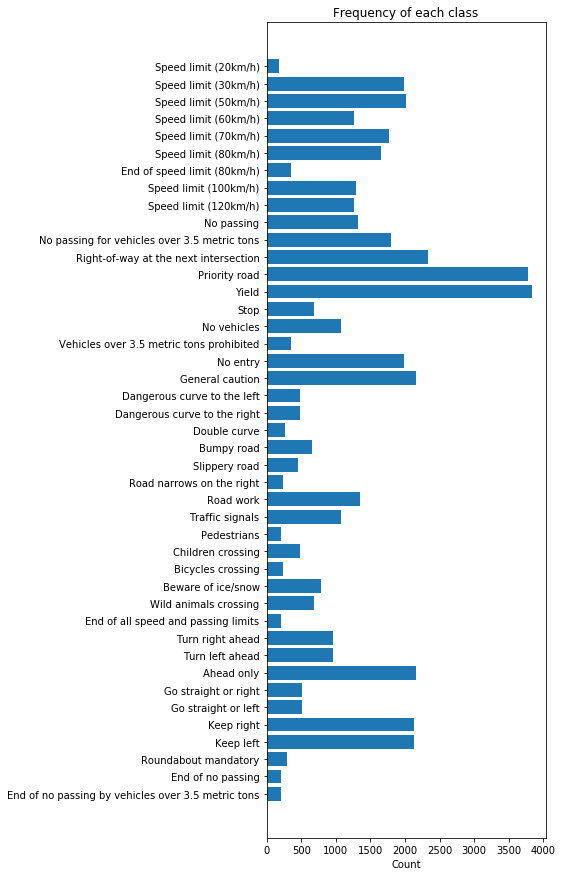

In [17]:
X_train = np.concatenate([X_train, X_augment], axis=0)
y_train = np.concatenate([y_train, y_augment], axis=0)

n_train = X_train.shape[0]

classes, counts = np.unique(y_train, return_counts=True)

fig = plt.figure(figsize=(5,15))
plt.barh(classes, counts, align='center')
plt.yticks(classes, names['SignName'])
plt.xlabel('Count')
plt.title('Frequency of each class')
plt.gca().invert_yaxis()
 
plt.show()

The whole dataset is still quite imbalanced but we can now see that the flippable signs have many more examples and are more balanced. During training we can apply more augmentation methods, but for now we can move on with the rest of the processing steps:

In [18]:
def preprocess(data_array, gray=False):
    data = data_array.copy()
    
    if gray:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        gray_stack = np.empty_like(data[...,:1])
        for i in range(data.shape[0]):
            gray_stack[i,:,:,0] = clahe.apply(cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY))
        data = gray_stack
    
    return (data.astype(np.float32)-128)/128

X_train1 = preprocess(X_train)
X_valid1 = preprocess(X_valid)
X_test1 = preprocess(X_test)

X_train2 = preprocess(X_train, gray=True)
X_valid2 = preprocess(X_valid, gray=True)
X_test2 = preprocess(X_test, gray=True)

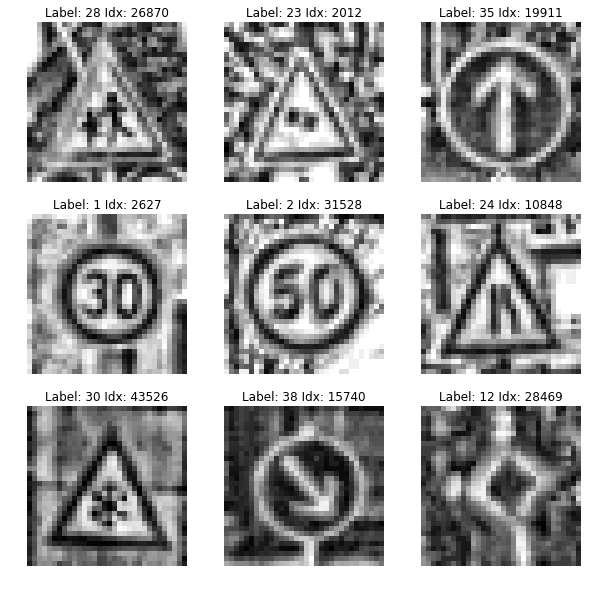

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.ravel()

for i in range(9):
    idx = np.random.randint(0, n_train)
    axs[i].set_title('Label: ' + str(y_train[idx])+ ' Idx: '+ str(idx))
    axs[i].imshow((X_train2[idx]*128+128).squeeze(), cmap='gray')
    axs[i].set_axis_off()

### Model Architecture

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):
    mu = 0
    sigma = 0.1
    weights = {'w1': tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean=mu, stddev=sigma)),
               'w2': tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma)),
               'w3': tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma)),
               'w4': tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma)),
               'w5': tf.Variable(tf.truncated_normal(shape=(84,n_classes), mean=mu, stddev=sigma))}
    
    bias = {'b1': tf.Variable(tf.truncated_normal(shape=[6], mean=mu, stddev=sigma)),
            'b2': tf.Variable(tf.truncated_normal(shape=[16], mean=mu, stddev=sigma)),
            'b3': tf.Variable(tf.truncated_normal(shape=[120], mean=mu, stddev=sigma)),
            'b4': tf.Variable(tf.truncated_normal(shape=[84], mean=mu, stddev=sigma)),
            'b5': tf.Variable(tf.truncated_normal(shape=[n_classes], mean=mu, stddev=sigma))}
    
    # Convolutional 1 
    x = tf.nn.conv2d(input=x, filter=weights['w1'], strides=[1,1,1,1], padding='VALID')
    x = tf.nn.bias_add(x, bias['b1'])
    
    # Activation
    x = tf.nn.relu(x)
    
    # Pooling
    x = tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    #Convolutional 2
    x = tf.nn.conv2d(input=x, filter=weights['w2'], strides=[1,1,1,1], padding='VALID')
    x = tf.nn.bias_add(x, bias['b2'])
    
    # Activation
    x = tf.nn.relu(x)
    
    # Pooling
    x = tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    # Flatten
    x = tf.contrib.layers.flatten(x)
    
    # Fully connected 1
    x = tf.add(tf.matmul(x, weights['w3']), bias['b3'])
    x = tf.nn.relu(x)
    
    # Fully connected 2
    x = tf.add(tf.matmul(x, weights['w4']), bias['b4'])
    x = tf.nn.relu(x)
    
    # Fully connected 3
    logits = tf.add(tf.matmul(x, weights['w5']), bias['b5'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(acc_op, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
learning_rate = 0.001
batch_size = 128
epochs = 10

x = tf.placeholder(tf.float32, shape=(None,)+image_shape)
y = tf.placeholder(tf.int32, (None))
y_one_hot = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
acc_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    print('Training')
    for e in range(epochs):
        X_train1, y_train = shuffle(X_train1, y_train)
        for offset in range(0, n_train, batch_size):
            batch_x, batch_y = X_train1[offset:offset+batch_size], y_train[offset:offset+batch_size]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        valid_acc = evaluate(X_valid1, y_valid)
        print("Epoch number {}".format(e+1))
        print("Validation Accuracy = {:.3f}".format(valid_acc))
        print()
        
    saver.save(sess, './traffic_lenet')
    print("Model saved")
        

Training
Epoch number 1
Validation Accuracy = 0.782

Epoch number 2
Validation Accuracy = 0.843

Epoch number 3
Validation Accuracy = 0.880

Epoch number 4
Validation Accuracy = 0.890

Epoch number 5
Validation Accuracy = 0.900

Epoch number 6
Validation Accuracy = 0.895

Epoch number 7
Validation Accuracy = 0.906

Epoch number 8
Validation Accuracy = 0.910

Epoch number 9
Validation Accuracy = 0.889

Epoch number 10
Validation Accuracy = 0.908

Model saved


In [23]:
def VGG_inspired(x, prob):
    mu = 0
    sigma = 0.1
    weights = {'w1': tf.Variable(tf.truncated_normal(shape=(5,5,1,32), mean=mu, stddev=sigma)),
               'w11': tf.Variable(tf.truncated_normal(shape=(5,5,32,32), mean=mu, stddev=sigma)),
               'w2': tf.Variable(tf.truncated_normal(shape=(5,5,32,64), mean=mu, stddev=sigma)),
               'w21': tf.Variable(tf.truncated_normal(shape=(5,5,64,64), mean=mu, stddev=sigma)),
               'w3': tf.Variable(tf.truncated_normal(shape=(5,5,64,128), mean=mu, stddev=sigma)),
               'w31': tf.Variable(tf.truncated_normal(shape=(5,5,128,128), mean=mu, stddev=sigma)),
               'w4': tf.Variable(tf.truncated_normal(shape=(3584,1024), mean=mu, stddev=sigma)),
               'w5': tf.Variable(tf.truncated_normal(shape=(1024,512), mean=mu, stddev=sigma)),
               'w6': tf.Variable(tf.truncated_normal(shape=(512,n_classes), mean=mu, stddev=sigma))}
    
    bias = {'b1': tf.Variable(tf.truncated_normal(shape=[32], mean=mu, stddev=sigma)),
            'b11': tf.Variable(tf.truncated_normal(shape=[32], mean=mu, stddev=sigma)),
            'b2': tf.Variable(tf.truncated_normal(shape=[64], mean=mu, stddev=sigma)),
            'b21': tf.Variable(tf.truncated_normal(shape=[64], mean=mu, stddev=sigma)),
            'b3': tf.Variable(tf.truncated_normal(shape=[128], mean=mu, stddev=sigma)),
            'b31': tf.Variable(tf.truncated_normal(shape=[128], mean=mu, stddev=sigma)),
            'b4': tf.Variable(tf.truncated_normal(shape=[1024], mean=mu, stddev=sigma)),
            'b5': tf.Variable(tf.truncated_normal(shape=[512], mean=mu, stddev=sigma)),
            'b6': tf.Variable(tf.truncated_normal(shape=[n_classes], mean=mu, stddev=sigma))}
    
    # Convolutional 1 
    x = tf.nn.conv2d(input=x, filter=weights['w1'], strides=[1,1,1,1], padding='SAME')
    x = tf.nn.bias_add(x, bias['b1'])
    
    # Activation
    x = tf.nn.relu(x)
    print('Conv1:', x.shape)
    
    # Convolutional 2 
    x = tf.nn.conv2d(input=x, filter=weights['w11'], strides=[1,1,1,1], padding='SAME')
    x = tf.nn.bias_add(x, bias['b11'])
    
    # Activation
    x = tf.nn.relu(x)
    print('Conv2:', x.shape)
    
    # Pooling
    x1 = tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    x1 = tf.nn.dropout(x1, keep_prob=prob)
    print('First Pooling:', x1.shape)
    
    #Convolutional 3
    x = tf.nn.conv2d(input=x1, filter=weights['w2'], strides=[1,1,1,1], padding='SAME')
    x = tf.nn.bias_add(x, bias['b2'])
    
    # Activation
    x = tf.nn.relu(x)
    print('Conv3:', x.shape)
    
    # Convolutional 4
    x = tf.nn.conv2d(input=x, filter=weights['w21'], strides=[1,1,1,1], padding='SAME')
    x = tf.nn.bias_add(x, bias['b21'])
    
    # Activation
    x = tf.nn.relu(x)
    print('Conv4:', x.shape)
    
    # Pooling
    x2 = tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    x2 = tf.nn.dropout(x2, keep_prob=prob)
    print('Second Pooling:', x2.shape)
    
    #Convolutional 5
    x = tf.nn.conv2d(input=x2, filter=weights['w3'], strides=[1,1,1,1], padding='SAME')
    x = tf.nn.bias_add(x, bias['b3'])
    print('Conv5:', x.shape)
    
    # Activation
    x = tf.nn.relu(x)
                               
    # Convolutional 6
    x = tf.nn.conv2d(input=x, filter=weights['w31'], strides=[1,1,1,1], padding='SAME')
    x = tf.nn.bias_add(x, bias['b31'])
    
    # Activation
    x = tf.nn.relu(x)
    print('Conv6:', x.shape)
    
    # Pooling
    x3 = tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    x3 = tf.nn.dropout(x3, keep_prob=prob)
    print('Third Pooling:', x3.shape)
    
    x_skip1 = tf.nn.max_pool(value=x1, ksize=[1,4,4,1], strides=[1,4,4,1], padding='VALID')
    print('Skip1 shape:', x_skip1.shape)
    x_skip2 = tf.nn.max_pool(value=x2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print('Skip2 shape:', x_skip2.shape)
    
    x_concat = tf.concat((x3, x_skip1, x_skip2), axis=3)
    print('Concat:', x_concat.shape)
    
    # Flatten
    x = tf.contrib.layers.flatten(x_concat)
    
    # Fully connected 1
    x = tf.add(tf.matmul(x, weights['w4']), bias['b4'])
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob=prob)
    
    # Fully connected 2
    x = tf.add(tf.matmul(x, weights['w5']), bias['b5'])
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob=prob)
    
    # Fully connected 3
    logits = tf.add(tf.matmul(x, weights['w6']), bias['b6'])
    
    return logits

Using TensorFlow backend.


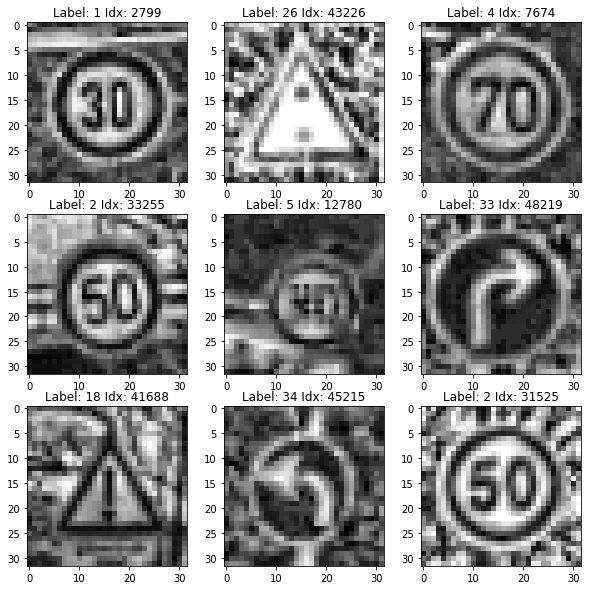

In [24]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( 
    #rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='constant')

fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.ravel()

for i in range(9):
    idx = np.random.randint(0, n_train)
    axs[i].set_title('Label: ' + str(y_train[idx])+ ' Idx: '+ str(idx))
    axs[i].imshow((X_train2[idx]*128+128).squeeze(), cmap='gray')

In [25]:
def evaluate2(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(acc_op, feed_dict={x: batch_x, y: batch_y, prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

tf.reset_default_graph()

learning_rate = 0.001
batch_size = 128
epochs = 50

x = tf.placeholder(tf.float32, shape=(None,)+(32,32,1))
y = tf.placeholder(tf.int32, (None))
y_one_hot = tf.one_hot(y, n_classes)
prob = tf.placeholder(tf.float32, name='keep_prob')

logits = VGG_inspired(x, prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
acc_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

Conv1: (?, 32, 32, 32)
Conv2: (?, 32, 32, 32)
First Pooling: (?, 16, 16, 32)
Conv3: (?, 16, 16, 64)
Conv4: (?, 16, 16, 64)
Second Pooling: (?, 8, 8, 64)
Conv5: (?, 8, 8, 128)
Conv6: (?, 8, 8, 128)
Third Pooling: (?, 4, 4, 128)
Skip1 shape: (?, 4, 4, 32)
Skip2 shape: (?, 4, 4, 64)
Concat: (?, 4, 4, 224)


In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    print('Training')
    
    for e in range(epochs):
        batches = 0
        for batch_x, batch_y in datagen.flow(X_train2, y_train, batch_size=batch_size):
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, prob:0.5})
            batches += 1
            if batches >= len(X_train2) / batch_size:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break
    
        valid_acc = evaluate2(X_valid2, y_valid)
        print("Epoch number {}".format(e+1))
        print("Validation Accuracy = {:.3f}".format(valid_acc))
        print()
            
        
    saver.save(sess, './traffic_vgg')
    print("Model saved")

Training
Epoch number 1
Validation Accuracy = 0.075

Epoch number 2
Validation Accuracy = 0.210

Epoch number 3
Validation Accuracy = 0.293

Epoch number 4
Validation Accuracy = 0.420

Epoch number 5
Validation Accuracy = 0.520

Epoch number 6
Validation Accuracy = 0.578

Epoch number 7
Validation Accuracy = 0.607

Epoch number 8
Validation Accuracy = 0.673

Epoch number 9
Validation Accuracy = 0.671

Epoch number 10
Validation Accuracy = 0.727

Epoch number 11
Validation Accuracy = 0.766

Epoch number 12
Validation Accuracy = 0.787

Epoch number 13
Validation Accuracy = 0.822

Epoch number 14
Validation Accuracy = 0.845

Epoch number 15
Validation Accuracy = 0.864

Epoch number 16
Validation Accuracy = 0.882

Epoch number 17
Validation Accuracy = 0.886

Epoch number 18
Validation Accuracy = 0.897

Epoch number 19
Validation Accuracy = 0.887

Epoch number 20
Validation Accuracy = 0.907

Epoch number 21
Validation Accuracy = 0.920

Epoch number 22
Validation Accuracy = 0.909

Epoch numb

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Test set accuracy

Before trying the model on new images from the web we can calculate the test set accuracy: 

In [27]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./traffic_vgg' + '.meta', clear_devices=True)
    saver.restore(sess, './traffic_vgg')
    test_acc = evaluate2(X_test2, y_test)
    print("Test Accuracy = {:.3f}".format(test_acc))

INFO:tensorflow:Restoring parameters from ./traffic_vgg
Test Accuracy = 0.945


### Load and Output the Images

In [28]:
test_images = []
test_labels = []
for image_name in os.listdir('test_images'):
    img = cv2.imread('./test_images/'+image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)
    test_labels.append(image_name.split('.')[0])

In [29]:
test_labels = np.array(test_labels).astype(np.int32)

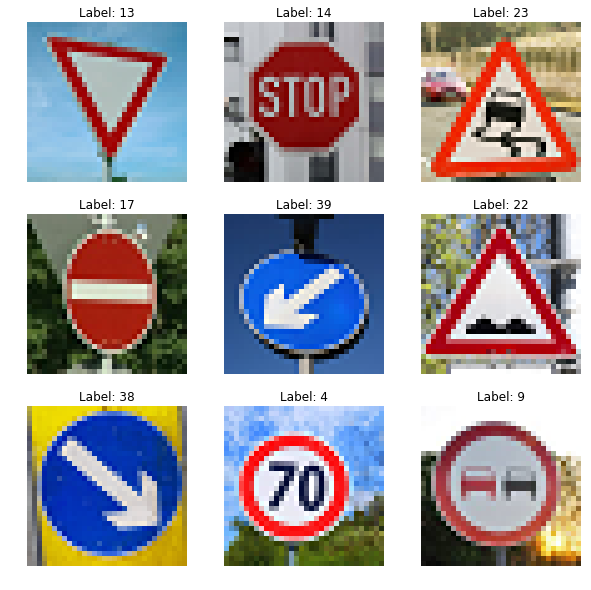

In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


fig, axs = plt.subplots(3, 3, figsize=(10,10))
axs = axs.ravel()

for i in range(9):
    axs[i].set_title('Label: ' + str(test_labels[i]))
    axs[i].imshow(test_images[i])
    axs[i].set_axis_off()

### Predict the Sign Type for Each Image

In [32]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

test_images = preprocess(np.array(test_images), gray=True)

In [33]:

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./traffic_vgg' + '.meta', clear_devices=True)
    saver.restore(sess, './traffic_vgg')
    y_pred = np.zeros(9, dtype=np.int32)
    #sess = tf.get_default_session()
    y_pred = sess.run(tf.argmax(logits, 1), feed_dict={x:test_images, prob:1})

INFO:tensorflow:Restoring parameters from ./traffic_vgg


In [34]:
y_pred

array([13, 14, 23, 17, 39, 22, 38,  4,  9])

### Analyze Performance

In [35]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

compare = y_pred == test_labels
accuracy = np.sum(compare)/len(compare)
print('Accuracy: ' + str(np.round(accuracy*100, 2)) + '%')

Accuracy: 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [36]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./traffic_vgg' + '.meta', clear_devices=True)
    saver.restore(sess, './traffic_vgg')
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits, dim=1), k=5), feed_dict={x:test_images, prob:1.})    

INFO:tensorflow:Restoring parameters from ./traffic_vgg


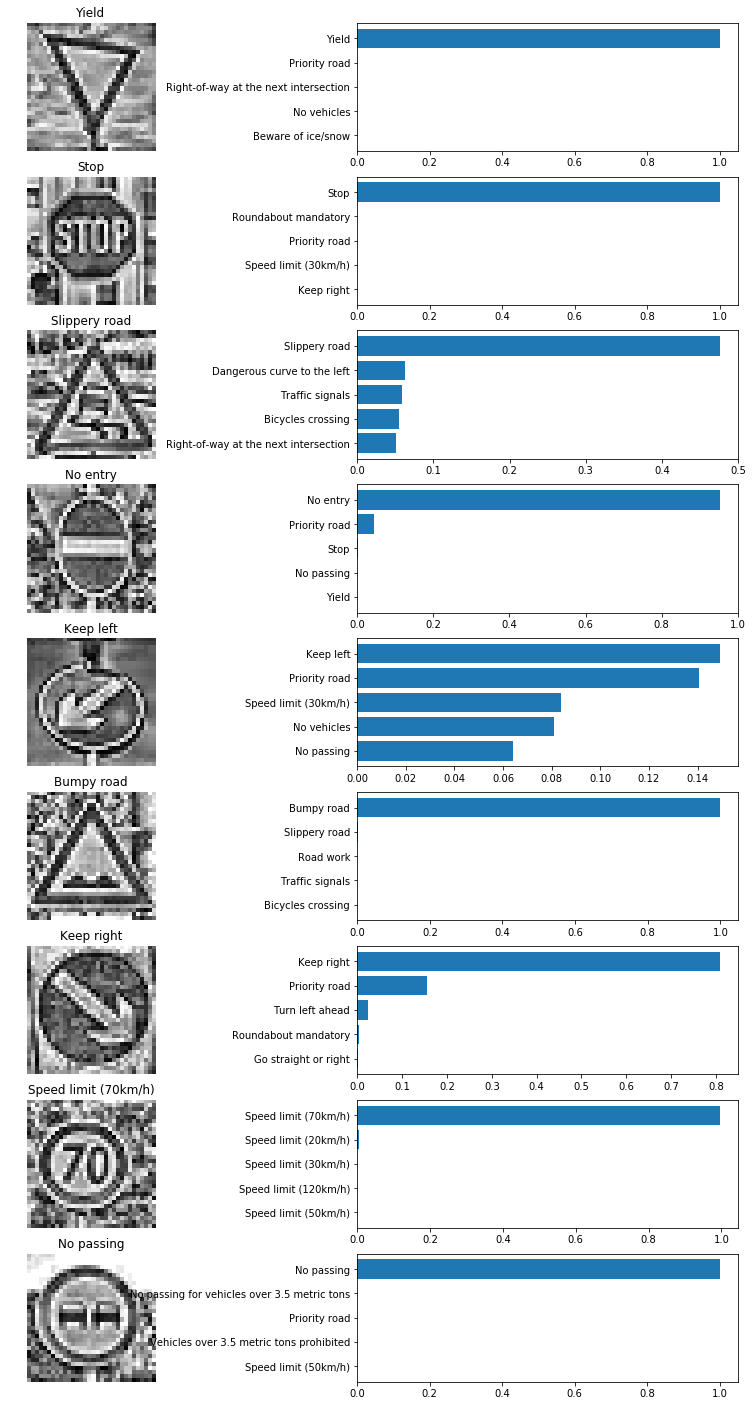

In [37]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

fig, axs = plt.subplots(9, 2, figsize=(15,25))
axs = axs.ravel()

for i in range(0, 18, 2):
    index = range(len(top5[1][int(i/2)]))
    axs[i].set_title(names['SignName'].loc[test_labels[int(i/2)]])
    axs[i].imshow(test_images[int(i/2)].squeeze(), cmap='gray')
    axs[i].set_axis_off()
    axs[i+1].barh(index, top5[0][int(i/2)])
    axs[i+1].set_yticks(index)
    axs[i+1].set_yticklabels(names['SignName'].loc[top5[1][int(i/2)]])
    axs[i+1].invert_yaxis()
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [38]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph('./traffic_vgg' + '.meta', clear_devices=True)
        saver.restore(sess, './traffic_vgg')

        activation = tf_activation.eval(session=sess,feed_dict={x : image_input, prob:1.0})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(int(tf_activation.get_shape()[-1])/8,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [39]:
graph = tf.get_default_graph()

INFO:tensorflow:Restoring parameters from ./traffic_vgg


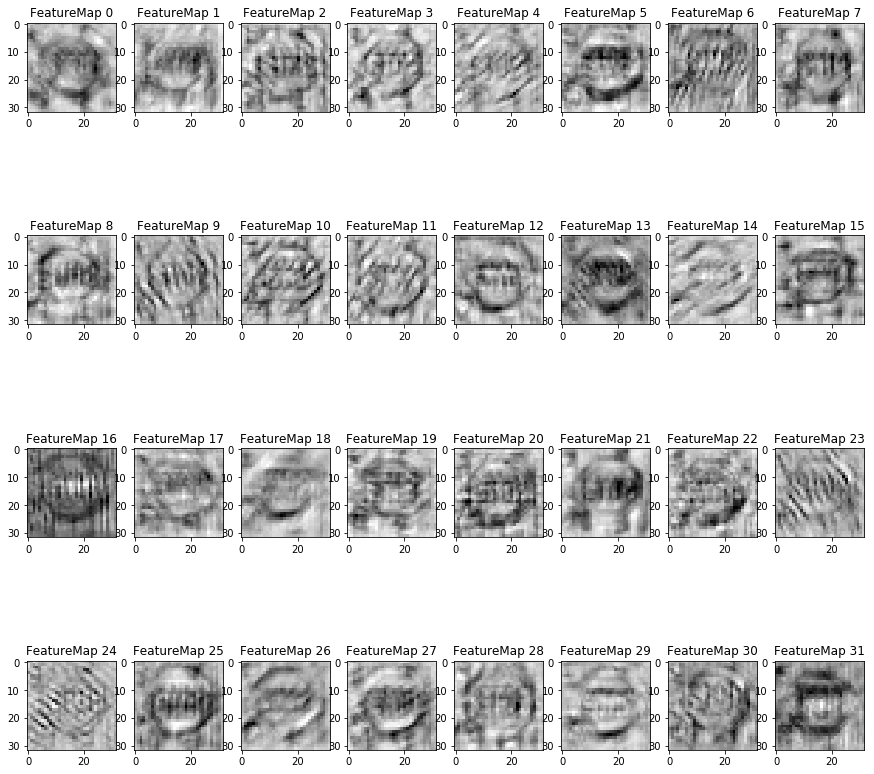

In [41]:
outputFeatureMap(np.expand_dims(test_images[1], axis=0), graph.get_tensor_by_name("Conv2D_1:0"))

This visualization is quite interesting as it shows how each feature map focuses on different features. For example feature map 16 seems to pick up on vertical lines while others (like feature maps 10, 11, 23 and 24) focus on diagonal lines in different directions. Practically all of them focus on what is happening in the center of the image, ignoring the background of the signs. 